In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.3760 - accuracy: 0.8852
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0909 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0407 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0332 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0262 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0204 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0197 - accuracy: 0.99300s - los
Epoch 10/10
1875/1875 [==============================] -

313/313 [==============================] - 8s 8ms/step - loss: 0.0664 - accuracy: 0.9843


D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


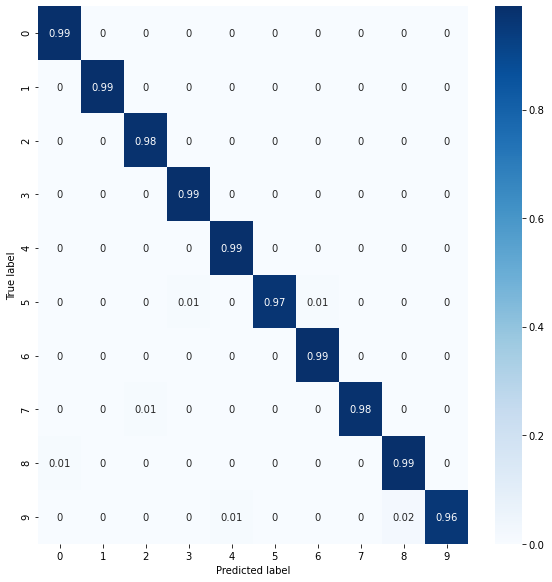

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

model.evaluate(x_test, y_test)

y_pred=model.predict_classes(x_test)
classes = [0,1,2,3,4,5,6,7,8,9]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
index = classes,
columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [6]:
import cv2

0.7


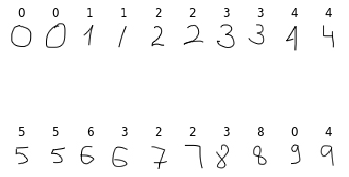

In [7]:
count = 0
for i in range(10):
    for j in range(2):
        name = str(i) + '_' + str(j) + '.jpg'
        image = cv2.imread('numbers/' + name, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        image = image.astype('float32')
        image = image.reshape(1, 28, 28, 1)
        image = 255-image
        image /= 255
        predict = model.predict(image)
        predict = predict.argmax()
        plt.subplot(2, 10, (i*2 + j + 1))
        plt.axis('off')
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(str(predict))
        if i == predict:
            count += 1
print(count/20)